In [1]:
import os
import pickle
import json
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
from scipy.spatial import distance
from tqdm import tqdm_notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
import keras
from keras.applications.xception import Xception, preprocess_input
from keras.models import Model, load_model
from keras import layers
from keras import backend as K
from keras.preprocessing import image
from keras.utils import Sequence, to_categorical

/home/zhanggw/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
TESTB_DIR = "data/DatasetB_20180919/"

In [6]:
TRAINB_DIR = './data/DatasetB_20180919/'

In [7]:
class_word = {}
df = pd.read_csv(os.path.join(TRAINB_DIR, 'label_list.txt'), sep='\t', header=None)
for idx, row in df.iterrows():
    class_word[row[0]] = row[1]

In [4]:
submit = pd.read_csv("submit-20180921-133738.txt", sep='\t', header=None)

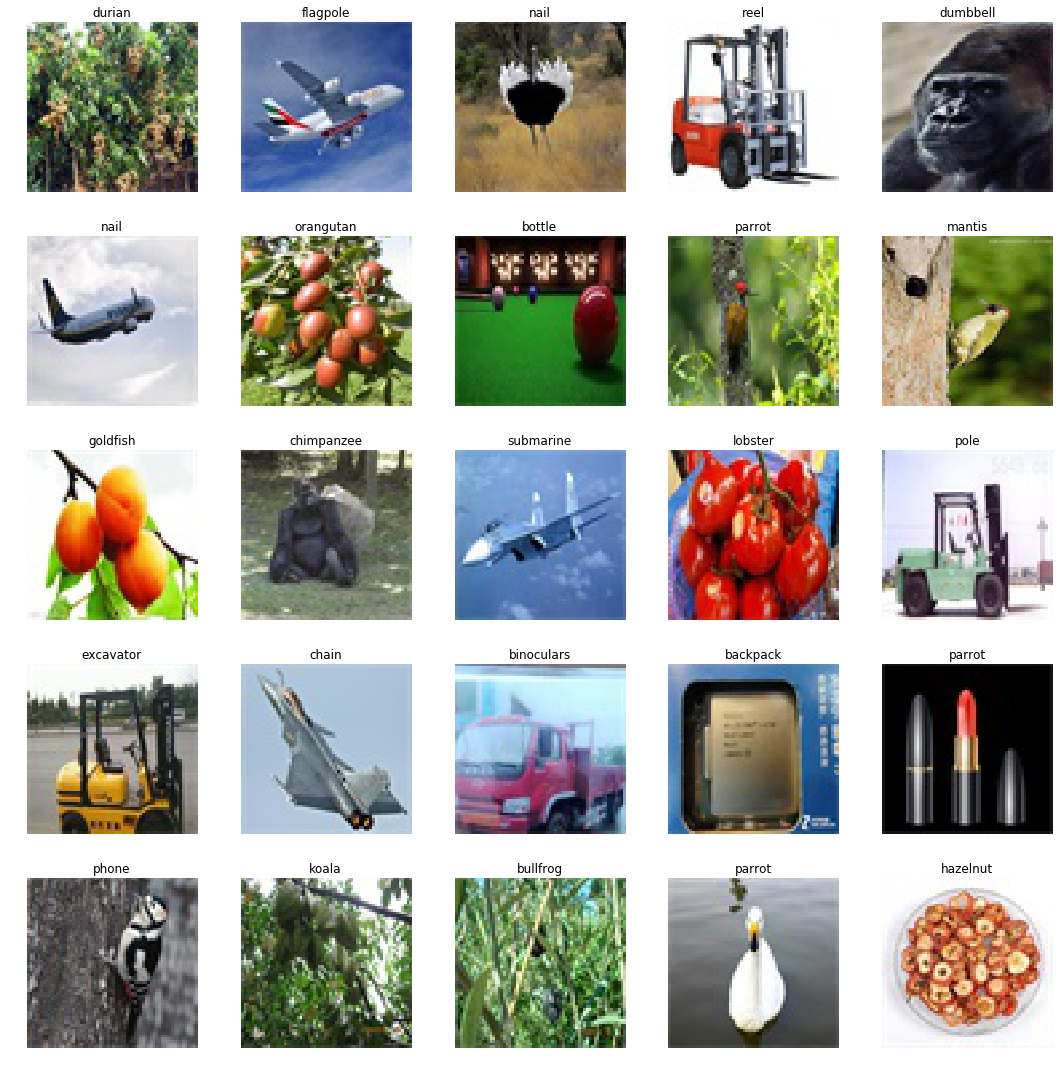

In [11]:
samples = submit.sample(25)

ROW = 5
COL = 5

fig, axs = plt.subplots(ROW, COL, figsize=(15,15))
for y in range(ROW):
    for x in range(COL):
        idx = y*COL+x
        row = samples.iloc[idx]
        fname = row[0]

        fname = os.path.join(TESTB_DIR, 'test', fname)
        cname = row[1]
        cname = class_word[cname]
        img = io.imread(fname)
        ax = axs[x, y]
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(cname)
plt.tight_layout()
plt.show()